# Import

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np

import matplotlib.pyplot as plt



In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train.astype('float32') / 255.0, x_test.astype('float32') / 255.0

# One-hot encode the labels (optional)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [3]:
#Define the CNN Model
def create_cnn_model():
    model = models.Sequential()

    # First convolutional block: Conv2D -> ReLU -> MaxPooling
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))

    # Second convolutional block
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Third convolutional block
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten and add dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))

    # Output layer
    model.add(layers.Dense(10, activation='softmax'))  # 10 classes for CIFAR-10

    return model

model = create_cnn_model()

C:\Users\Ali\.conda\envs\tensorflow_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - accuracy: 0.3449 - loss: 1.7822 - val_accuracy: 0.5645 - val_loss: 1.2186
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.6077 - loss: 1.0959 - val_accuracy: 0.6495 - val_loss: 1.0051
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 95ms/step - accuracy: 0.6875 - loss: 0.8886 - val_accuracy: 0.6636 - val_loss: 0.9674
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 97ms/step - accuracy: 0.7310 - loss: 0.7742 - val_accuracy: 0.7122 - val_loss: 0.8337
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.7600 - loss: 0.6719 - val_accuracy: 0.7191 - val_loss: 0.8072
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 97ms/step - accuracy: 0.7944 - loss: 0.5821 - val_accuracy: 0.7297 - val_loss: 0.7919
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 95ms/step - accuracy: 0.8137 - loss: 0.5302 - val_accuracy: 0.7303 - val_loss: 0.8197
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 97ms/step - accuracy: 0.8384 - loss: 0.4628 - 

In [6]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

313/313 - 4s - 13ms/step - accuracy: 0.7237 - loss: 1.3991

Test accuracy: 0.7237


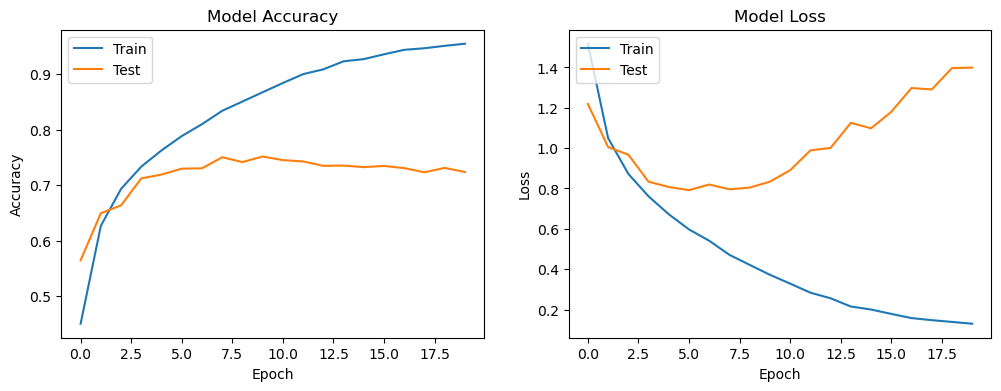

In [7]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [9]:
# Save the model in the recommended format
model.save('cnn_cifar10_model.keras')
# Load the model
#loaded_model = tf.keras.models.load_model('cnn_cifar10_model.keras')